## NBA Player Advanced Stats Visualization

In [103]:
#These lines import the necessary libraries.

import matplotlib.pyplot as plt
import numpy as np
from datascience import *
from cs104 import *
%matplotlib inline

## Data Source

_https://www.kaggle.com/datasets/owenrocchi/nba-advanced-stats-20022022/_ 
Credit goes to Owen Rocchi for creating a csv of advanced stats from 2002 to 2022.


## One Player PER Graph -- Kevin Durant

In [104]:
# Read data into table and show the first few lines.
nba = Table.read_table('NBAAdvancedStats2002-2022.csv')
nba.show(3)

# Clean the data and show the first few lines again
nba = nba.take_clean('year-name', str, 'Pos', str, 'Age', int, 'Tm', str, 'G', int, 'MP', int, 'PER', float, '3PAr', float, 'FTr', float, 'ORB%', float, 'DRB%', float, 'TRB%', float, 'AST%', float, 'STL%', float, 'BLK%', float, 'TOV%', float, 'USG%', float, 'OWS', float, 'DWS', float, 'WS', float, 'WS/48', float, 'OBPM', float, 'DBPM', float, 'BPM', float, 'VORP', float, 'year', int)
nba.show(3)

Unnamed: 0,year-name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,2003-Tariq Abdul-Wahad,SG,28,DAL,14,204,12.4,0.47,0.017,0.103,7.6,14,10.8,15.4,1.5,1.1,10.3,15,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0,2003
1,2003-Shareef Abdur-Rahim,PF,26,ATL,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13,24.2,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003
2,2003-Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5,9.8,1.2,0.3,10.7,21.3,0.1,1,1.1,0.04,-3.3,-1.2,-4.5,-0.9,2003


Unnamed: 0,year-name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,2003-Tariq Abdul-Wahad,SG,28,DAL,14,204,12.4,0.47,0.017,0.103,7.6,14,10.8,15.4,1.5,1.1,10.3,15,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0,2003
1,2003-Shareef Abdur-Rahim,PF,26,ATL,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13,24.2,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003
2,2003-Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5,9.8,1.2,0.3,10.7,21.3,0.1,1,1.1,0.04,-3.3,-1.2,-4.5,-0.9,2003


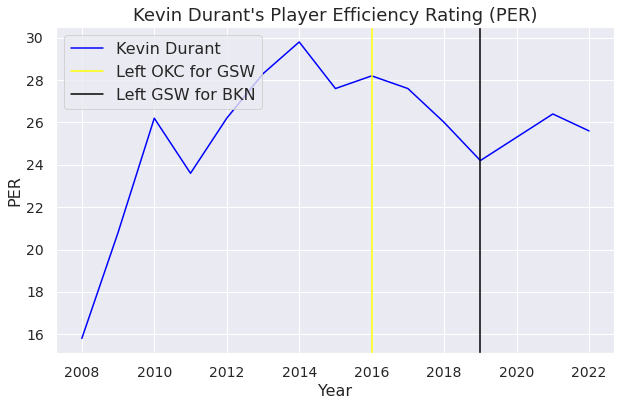

In [105]:
# Get data for Kevin Durant
kd = nba.where('year-name', are.containing('Kevin Durant'))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(kd.column('year'), kd.column('PER'), label='Kevin Durant', color='blue')
plt.axvline(x=2016, color='yellow', label='Left OKC for GSW')
plt.axvline(x=2019, color='black', label='Left GSW for BKN')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('PER')
plt.title("Kevin Durant's Player Efficiency Rating (PER)")
plt.legend()

# Set integer tick labels for every other year on the x-axis
x_ticks = range(int(min(kd.column('year'))), int(max(kd.column('year'))) + 1, 2)
plt.xticks(x_ticks)

# Show the plot
plt.show()


## Interactive One Player Graph

In [106]:
def player_stats_over_time(player, stat):
    player_table = nba.where('year-name', are.containing(player))
    player_table.plot('year', stat).set_title(player + "'s " + stat)

In [107]:
players = nba.column('year-name')
def name_only(players):
    modified_players = []
    for name in players:
        modified_players.append(name[5:])
    return modified_players
players = name_only(players)
stats = make_array('MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP')  
interact(player_stats_over_time, player = Choice(players), stat = Choice(stats))

interactive(children=(Dropdown(description='player', options=('Tariq Abdul-Wahad', 'Shareef Abdur-Rahim', 'Cou…

## Multiple Player Comparison

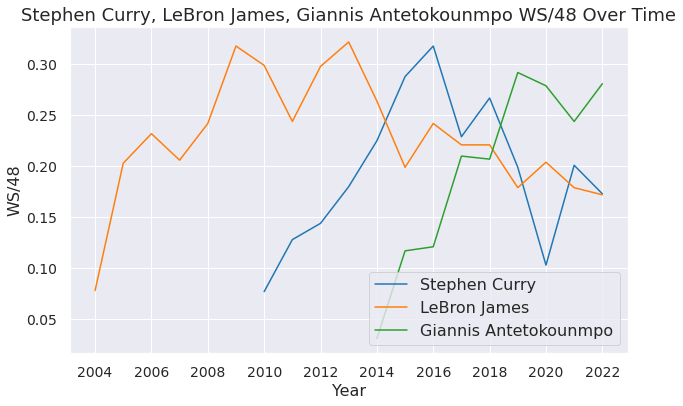

In [108]:
def multi_player_stats_over_time(players, stat):
    # Create an empty plot
    plt.figure(figsize=(10, 6))

    # Initialize min and max years
    min_year = float('inf')
    max_year = float('-inf')

    # Iterate through each player
    for player in players:
        player_table = nba.where('year-name', are.containing(player))
        min_year = min(min_year, min(player_table.column('year')))
        max_year = max(max_year, max(player_table.column('year')))
        plt.plot(player_table.column('year'), player_table.column(stat), label=player)

    # Customize the plot
    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.title(f'{", ".join(players)} {stat} Over Time')
    plt.legend()

    # Set integer tick labels for every other year on the x-axis
    x_ticks = range(int(min_year), int(max_year) + 1, 2)
    plt.xticks(x_ticks)

    # Show the plot
    plt.show()

# Example usage
selected_players = ['Stephen Curry', 'LeBron James', 'Giannis Antetokounmpo']
multi_player_stats_over_time(selected_players, 'WS/48')


The last 3 finals MVPs had a huge impact on their teams' success. In the regular season, LeBron James in 2019-20, Giannis Antetokounmpo in 2020-21, and Stephen Curry in 2021-22 all had impressive WS/48 numbers. The Lakers’ success was not solely dependent on LeBron's scoring but also on his playmaking, defensive contributions, and consistency. His WS/48 reflects this influence on both ends of the floor. Giannis’s impressive WS/48 highlights his dual-threat nature, contributing significantly on both ends of the floor. His ability to dominate the paint, draw free throws, and protect the rim made him indispensable to the Bucks’ success. Steph’s shooting range and ability to space the floor significantly enhanced the Warriors’ offensive dynamics. This influence is partly captured by his WS/48, which reflects his offensive efficiency and overall contribution to wins.

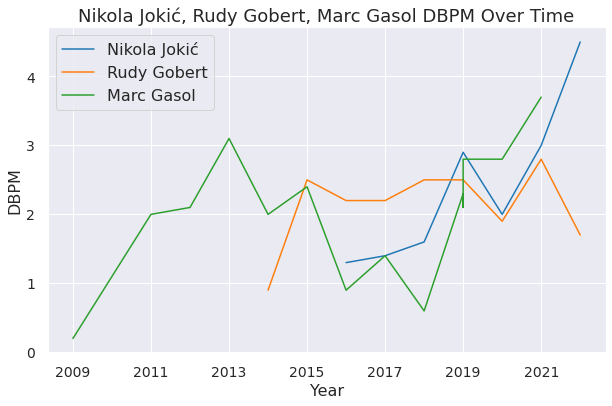

In [109]:
selected_players = ['Nikola Jokić', 'Rudy Gobert', 'Marc Gasol']
multi_player_stats_over_time(selected_players, 'DBPM')

While Nikola Jokić's defense isn't highly regarded among NBA pundits, the defensive metric DBPM (Defensive Box Plus Minus) has him among DPOY winners Rudy Gobert and Marc Gasol. DBPM values rebounding highly, explaining this to an extent. While Jokić may not possess elite shot-blocking abilities, his size and positioning allow him and rebound effectively. Jokić lacks the lateral speed to guard quicker, more agile players, which can be a liability in pick-and-roll situations. Opponents often target him in switches to exploit this weakness, leading to defensive breakdowns that are not fully captured by DBPM.

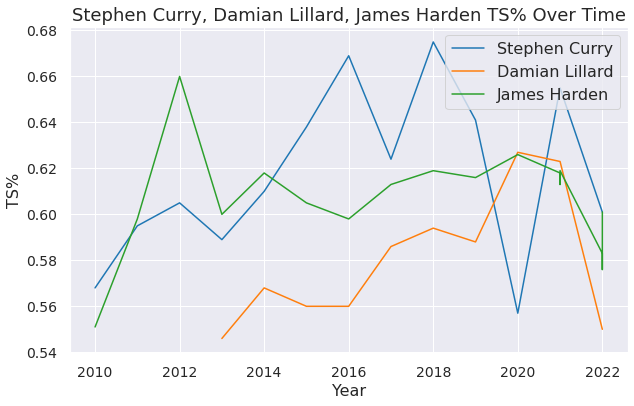

In [110]:
selected_players = ['Stephen Curry', 'Damian Lillard', 'James Harden']
multi_player_stats_over_time(selected_players, 'TS%')

Another statistic we can visualize is TS%, or True Shooting Percentage. It takes into account 2s, 3s, and FTs into one statistic. League average TS% has increased throughout the years, from 53.4% in 2014-15 to 56.6% in 2021-22. All the players here are well above league average, supporting their role as the number 1 options on their teams, with an exception to James Harden's 2021-22 season with the Nets. Harden's TS% rivals Lillard's due to his high free throw rate. Steph Curry still has a formidable gap between his TS% and other superstars from 2015-2021 with the exception of 2020, where he only played 5 games.

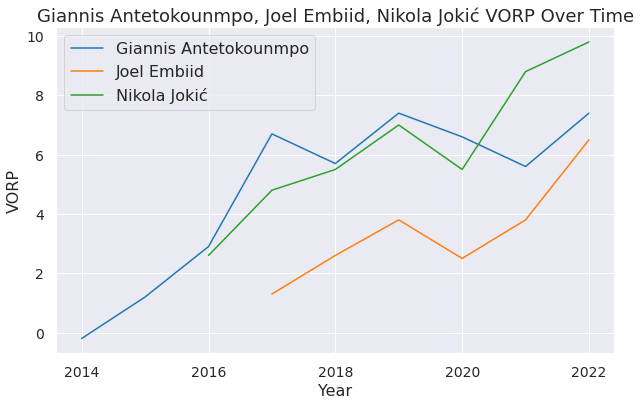

In [111]:
selected_players = ['Giannis Antetokounmpo', 'Joel Embiid', 'Nikola Jokić']
multi_player_stats_over_time(selected_players, 'VORP')

In [112]:
vorp22 = nba.where('year', are.equal_to(2022)).select('year-name', 'VORP').sort('VORP', descending = True)
vorp22.show(3)

year-name,VORP
2022-Nikola Jokić,9.8
2022-Giannis Antetokounmpo,7.4
2022-Joel Embiid,6.5


Recent MVP contenders Giannis Antetokounmpo, Joel Embiid, and Nikola Jokić all have shown their value in the all encompassing stat VORP (Value Over Replacement Player), the NBA's analog to MLB's WAR. VORP estimates the number of points per 100 possessions that a player contributes above a replacement-level player. These three held the top 3 positions in the VORP rankings in 2021-22.

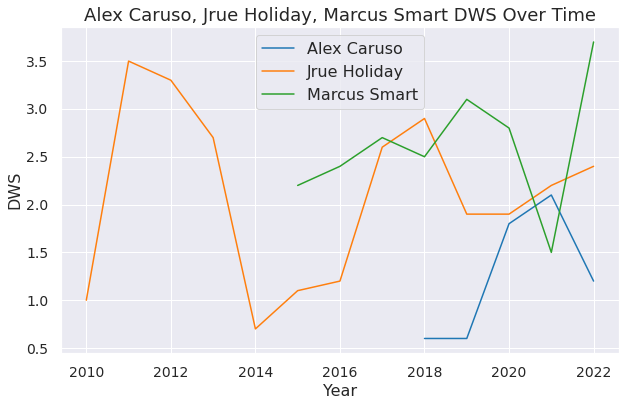

In [113]:
selected_players = ['Alex Caruso', 'Jrue Holiday', 'Marcus Smart']
multi_player_stats_over_time(selected_players, 'DWS')

Some of the best perimeter defenders in the league today have had unimpressive seasons according to the DWS (Defensive Win Shares) statistic. Jrue Holiday had a peak early on in his career, seemed to lose a bit of that impact in 2014-2016, and then returned to his stalwart status. A similar story can be said about Marcus Smart, who dropped to 1.5 DWS in 2020-21. This shows that context is crucial in this type of comparison, as this can be explained by these players playing in less total games. When projecting Alex Caruso's defensive impact, DWS can only show part of the story -- he also can be a star defensive player with enough minutes.

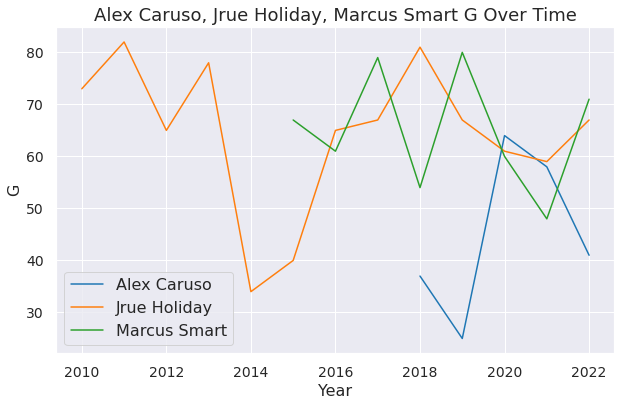

In [114]:
selected_players = ['Alex Caruso', 'Jrue Holiday', 'Marcus Smart']
multi_player_stats_over_time(selected_players, 'G')

This extra context shows that the graph of games played looks strikingly similar to the DWS graph.